<a href="https://colab.research.google.com/github/markoutsikou/DWS101-ML/blob/main/ML_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
from datetime import datetime
import holidays
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


# **Download USD Data**

In [92]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
input_df = ticker.history(period="5y").reset_index(drop = False)
input_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1254,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0
1255,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,0,0.0,0.0
1256,2025-11-05 00:00:00-05:00,100.180000,100.360001,100.059998,100.199997,0,0.0,0.0


# **Drop Irrelevant Columns**

In [93]:
input_df = input_df.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
input_df

,Date,Open,High,Low,Close
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999
...,...,...,...,...,...
1253,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1254,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003
1255,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001
1256,2025-11-05 00:00:00-05:00,100.180000,100.360001,100.059998,100.199997


# **Question 1 - Line plot**

In [94]:
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'])
fig.show()

# **Question 2**

If we look at the line plot, we can see that timeseries are non-stationary. We can see that, there are trends and seasonability as USD prices change over time. Finally, the mean and the absolute variance are not constant over the years.  

# **Question 3**
 When training a model on non-stationary timeseries, the model will learn to predict values around the mean value. If the mean value of the observed value changes, the model will probably fail to predict around the new mean value.


# **Question 4**
In June 2025, USD faced great depreciation and ended with its biggest loss since 1973. There was economic instability in US due to president's "stop-start tariff war" and Fed Reserve's uncertainty over rate cuts.
The dollar rebounded in July in response to better-than-expected US economic data, such as job creation. The numbers signaled that tariffs still haven’t had a significant impact on economic activity yet.

# **Question 5**
No, it is not possible to predict the next-day close price only by today's open, high, low and close. The next-day close depends on new information such as Fed decisions, market changes etc, and not on a deterministic function such as f(oₜ, hₜ, lₜ, cₜ) = cₜ₊₁.
Therefor, we could use those data to estimate volatility.

# **Qusetion 6**
No, when working with timeseries it has no meaning to split the data randomly in train-test.
In timeseries there is time dependance. If we suffle the data, there will be created data leakage.
So, the best way to split the data into train-test is keep all the older data for the training set and all the newer data for the test set.

# **Question 7 - Create train-test Dataframes**

In [95]:
train_df = df[df['Date'] < '2024-01-01']
test_df  = df[(df['Date'] >= '2024-01-01') & (df['Date'] < '2025-01-01')]

train_df = train_df.drop(columns=['Date'])
test_df  = test_df.drop(columns=['Date'])

print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

train_df

Train set shape: (791, 4)
Test set shape: (252, 4)


,Open,High,Low,Close
0,92.570000,92.820000,92.180000,92.230003
1,92.239998,92.959999,92.129997,92.730003
2,92.760002,92.970001,92.599998,92.750000
3,92.699997,93.209999,92.610001,93.040001
4,93.010002,93.139999,92.779999,92.959999
...,...,...,...,...
786,101.760002,101.900002,101.430000,101.699997
787,101.650002,101.769997,101.449997,101.470001
788,101.550003,101.570000,100.830002,100.989998
789,100.870003,101.300003,100.620003,101.230003


# **Question 8 - Create Timeframes**

In [96]:
def create_timeframes(data_df, n):
    timeframes = []
    timeframe_targets = []
    data_array = data_df.to_numpy()

    for i in range(data_df.shape[0] - (n + 1)):
        end = i + n
        timeframes.append(data_array[i: end])
        timeframe_targets.append(end)

    return np.array(timeframes), np.array(timeframe_targets)


inputs, targets = create_timeframes(input_df, 5)
inputs[0], inputs.shape, targets.shape

(array([[Timestamp('2020-11-06 00:00:00-0500', tz='America/New_York'),
         92.56999969482422, 92.81999969482422, 92.18000030517578,
         92.2300033569336],
        [Timestamp('2020-11-09 00:00:00-0500', tz='America/New_York'),
         92.23999786376953, 92.95999908447266, 92.12999725341797,
         92.7300033569336],
        [Timestamp('2020-11-10 00:00:00-0500', tz='America/New_York'),
         92.76000213623047, 92.97000122070312, 92.5999984741211, 92.75],
        [Timestamp('2020-11-11 00:00:00-0500', tz='America/New_York'),
         92.69999694824219, 93.20999908447266, 92.61000061035156,
         93.04000091552734],
        [Timestamp('2020-11-12 00:00:00-0500', tz='America/New_York'),
         93.01000213623047, 93.13999938964844, 92.77999877929688,
         92.95999908447266]], dtype=object),
 (1252, 5, 5),
 (1252,))

# **Question 9**
When we want to predict a short-term phenomenon such as the next day, the most recent data is more important because it gives us the recent movement. The older data become more and more irrelevant. So for short-term predictions a small N is better.

When we want to predict a longer horizon, the trend plays a bigger role. The model needs more historical data to understand the general pattern. So, for long-term predictions a larger N is better.



# **Question 10 - Spit Train-test Dataframes and Flatten**

In [97]:
n = 5

x_train, y_train = create_timeframes(train_df, n)
x_test, y_test   = create_timeframes(test_df, n)

x_train_flat = x_train.reshape((x_train.shape[0], n*4))
x_test_flat = x_test.reshape((x_test.shape[0], n*4))

print("\nSame number of input and target in train set:", len(x_train) == len(y_train))
print("Same number of input and target in test set:", len(x_test) == len(y_test))

print("\n1st x_train input:")
print(x_train[0])


Same number of input and target in train set: True
Same number of input and target in test set: True

1st x_train input:
[[92.56999969 92.81999969 92.18000031 92.23000336]
 [92.23999786 92.95999908 92.12999725 92.73000336]
 [92.76000214 92.97000122 92.59999847 92.75      ]
 [92.69999695 93.20999908 92.61000061 93.04000092]
 [93.01000214 93.13999939 92.77999878 92.95999908]]


# **Question 11 - Training Models and MAE computation**

,Model,MAE_Train,MAE_Test
0,Linear Regression,80.995181,525.926343
1,Random Forest,22.183541,490.287764
2,Bagging (Linear Regression),81.025222,523.954137
3,XGBoost,2.091960,502.101837
4,Stacking (Linear Regression),27.784729,481.191934


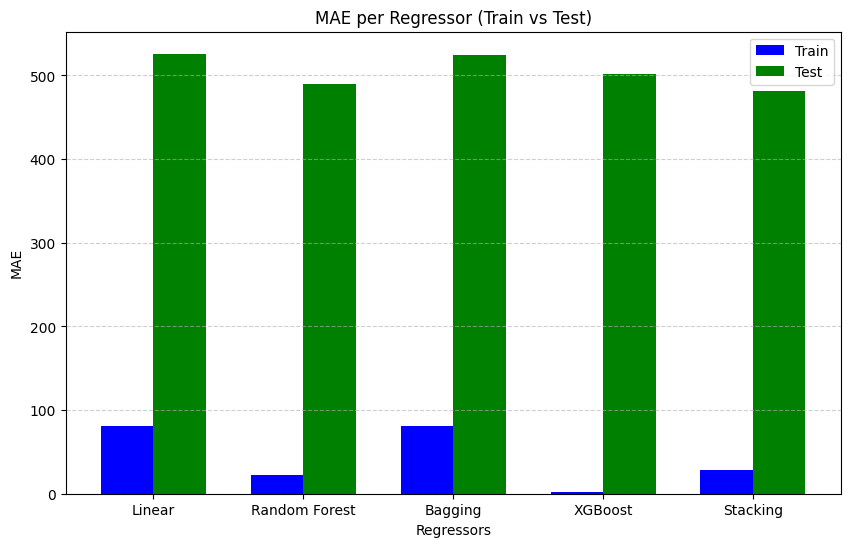

In [119]:
#a
lin_reg = LinearRegression()
lin_reg.fit(x_train_flat, y_train)
y_pred_train_lin = lin_reg.predict(x_train_flat)
y_pred_test_lin  = lin_reg.predict(x_test_flat)

#b
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train_flat, y_train)
y_pred_train_rf = rf_reg.predict(x_train_flat)
y_pred_test_rf  = rf_reg.predict(x_test_flat)

#c
bag_lin = BaggingRegressor(estimator = LinearRegression(), random_state=42)
bag_lin.fit(x_train_flat, y_train)
y_pred_train_bag = bag_lin.predict(x_train_flat)
y_pred_test_bag  = bag_lin.predict(x_test_flat)

#d
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train_flat, y_train)
y_pred_train_xgb = xgb_reg.predict(x_train_flat)
y_pred_test_xgb  = xgb_reg.predict(x_test_flat)

#e
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
]
stack_lin = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stack_lin.fit(x_train_flat, y_train)
y_pred_train_stack = stack_lin.predict(x_train_flat)
y_pred_test_stack  = stack_lin.predict(x_test_flat)

results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest',
        'Bagging (Linear Regression)',
        'XGBoost',
        'Stacking (Linear Regression)'
    ],
    'MAE_Train': [
        mean_absolute_error(y_train, y_pred_train_lin),
        mean_absolute_error(y_train, y_pred_train_rf),
        mean_absolute_error(y_train, y_pred_train_bag),
        mean_absolute_error(y_train, y_pred_train_xgb),
        mean_absolute_error(y_train, y_pred_train_stack)
    ],
    'MAE_Test': [
        mean_absolute_error(y_test, y_pred_test_lin),
        mean_absolute_error(y_test, y_pred_test_rf),
        mean_absolute_error(y_test, y_pred_test_bag),
        mean_absolute_error(y_test, y_pred_test_xgb),
        mean_absolute_error(y_test, y_pred_test_stack)
    ]
})

display(results)

mae_train = results['MAE_Train'].values
mae_test  = results['MAE_Test'].values

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, mae_train, width, color='blue', label='Train')
plt.bar(x + width/2, mae_test,  width, color='green', label='Test')

plt.xlabel("Regressors")
plt.ylabel("MAE")
plt.title("MAE per Regressor (Train vs Test)")
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

a) Linear Regression a statistical method used to find the relationship between a dependent variable and one or more independent variables by fitting a line of best fit to the data.

b) Random Forest Regression is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction. It is a type of supervised learning algorithm that can be used for both classification and regression tasks.

c) Bagging with linear regression is a method of averaging multiple linear regression models, each trained on a different bootstrap sample of the original data.

d) XGBoost Regressor is an optimized and scalable implementation of the gradient boosting framework that builds successive trees that correct the errors of the previous ones.

e) Stacking (Linear Regression) is an ensemble machine learning technique where a meta-regressor, often a linear regression model, combines the predictions of multiple base regression models to improve accuracy.

# **Question 12 - Log Returns**

,Date,Open,High,Low,Close,Month,Day,IsHoliday,Open_logret,High_logret,Low_logret,Close_logret
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,11,6,0,-0.003571,0.001507,-0.000543,0.005407
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,11,9,0,0.005622,0.000108,0.005089,0.000216
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,11,10,0,-0.000647,0.002578,0.000108,0.003122
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,11,11,1,0.003339,-0.000751,0.001834,-0.000860
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999,11,12,0,-0.000645,-0.001397,-0.000755,-0.002154
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,10,31,0,0.002610,0.001501,0.002913,0.000701
1254,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,11,3,1,0.002303,0.002697,0.000301,0.003498
1255,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,11,4,0,0.001998,0.000997,0.003203,-0.000200
1256,2025-11-05 00:00:00-05:00,100.180000,100.360001,100.059998,100.199997,11,5,1,-0.000719,-0.002514,-0.001710,-0.002218


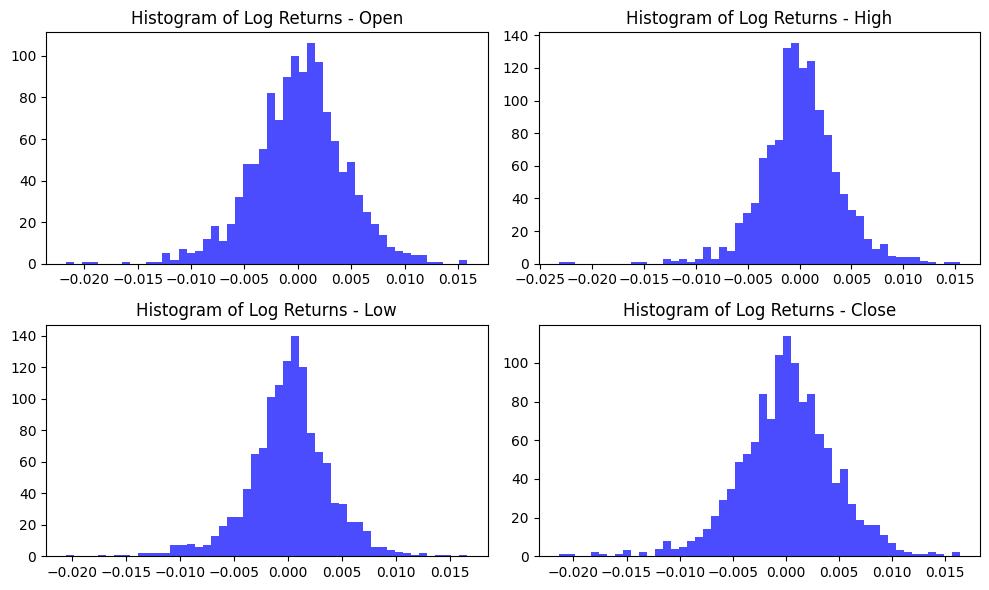

In [111]:
input_df['Month'] = input_df['Date'].dt.month
input_df['Day']   = input_df['Date'].dt.day

date_only = input_df['Date'].dt.tz_localize(None).dt.date
years = range(input_df['Date'].dt.year.min(), input_df['Date'].dt.year.max() + 1)
country_codes = ["US","GB","CA","DE","FR","JP","CN","AU","IN"]

holiday_dates = set()
for code in country_codes:
    cal = holidays.country_holidays(code, years=years)
    holiday_dates.update(cal.keys())

input_df["IsHoliday"] = pd.Series(date_only).isin(holiday_dates).astype("int8")

cols = ['Open', 'High', 'Low', 'Close']
for col in cols:
    input_df[f'{col}_logret'] = np.log(input_df[col].shift(-1) / input_df[col])

display(input_df)

plt.figure(figsize=(10, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(input_df[f'{col}_logret'].dropna(), bins=50, color = 'blue', alpha=0.7)
    plt.title(f'Histogram of Log Returns - {col}')
plt.tight_layout()
plt.show()

d) If a model predicts c(t+1) = 0.01 that means expected increase 1% in the price.

 If the price was c(t) = 0.95, the expected price would be c(t+1) = c(t) * e^0.01 ~ 0.96

# **Question 13 - Best Model line-plot**

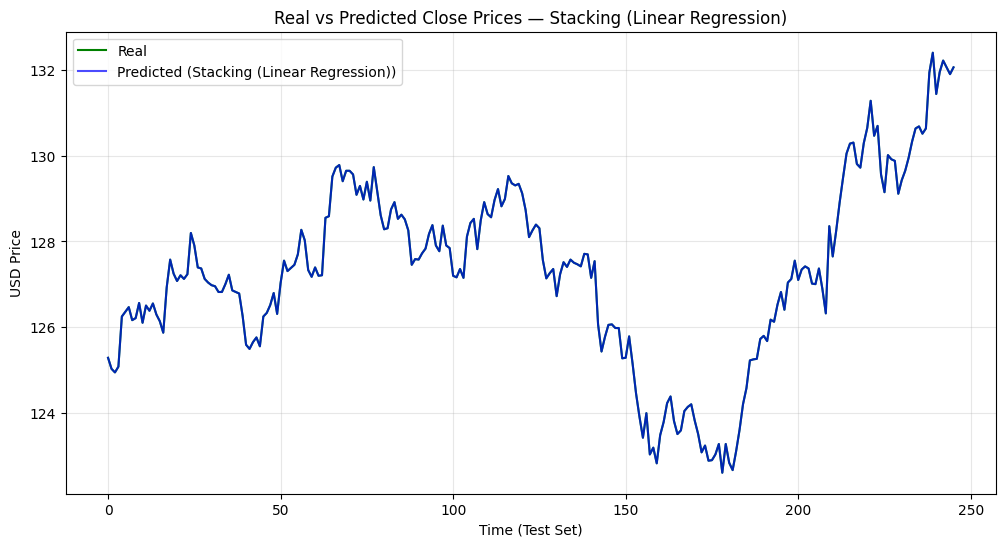

In [139]:
best_model_name = results.loc[results['MAE_Test'].idxmin(), 'Model']

model_dict = {
    'Linear Regression': lin_reg,
    'Random Forest': rf_reg,
    'Bagging (Linear Regression)': bag_lin,
    'XGBoost': xgb_reg,
    'Stacking (Linear Regression)': stack_lin
}

best_model = model_dict[best_model_name]

y_pred_test = best_model.predict(x_test_flat)

y_pred_test = np.clip(y_pred_test, -0.2, 0.2)
y_test = np.clip(y_test, -0.2, 0.2)


close_test_values = test_df['Close'].values[n:]
min_len = min(len(close_test_values), len(y_pred_test))
close_test_values = close_test_values[:min_len]
y_pred_test = y_pred_test[:min_len]
y_test = y_test[:min_len]


C_pred = close_test_values * np.exp(y_pred_test)
C_real = close_test_values * np.exp(y_test)

plt.figure(figsize=(12,6))
plt.plot(C_real, label='Real', color='green')
plt.plot(C_pred, label=f'Predicted ({best_model_name})', color='blue', alpha=0.7)
plt.title(f"Real vs Predicted Close Prices — {best_model_name}")
plt.xlabel("Time (Test Set)")
plt.ylabel("USD Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()